In [ ]:
#!unzip "/content/drive/MyDrive/Stanford Cars Dataset/archive.zip" -d "/content/drive/MyDrive/Stanford Cars Dataset/"
#!unzip "/content/drive/MyDrive/Stanford Cars Dataset/car_devkit.tgz" -d "/content/drive/MyDrive/Stanford Cars Dataset"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import os
from scipy.io import loadmat
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
#import random
import numpy as np
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,f1_score
import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import models,layers
#from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
#import pickle
import matplotlib.patches as patches

In [ ]:
print("Tensorflow Version : ",tf.__version__)
print("GPU","is working" if tf.config.list_physical_devices("GPU") else "is not working")

Tensorflow Version :  2.4.1
GPU is working


In [ ]:
mat_train=loadmat("/content/drive/MyDrive/Stanford Cars Dataset/devkit/cars_train_annos.mat")
mat_test=loadmat("/content/drive/MyDrive/Stanford Cars Dataset/devkit/cars_test_annos.mat")
mat_labels=loadmat("/content/drive/MyDrive/Stanford Cars Dataset/devkit/cars_meta.mat")
mat_test_labels=loadmat("/content/drive/MyDrive/Stanford Cars Dataset/cars_test_annos_withlabels.mat")

In [ ]:
mat_train

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 'annotations': array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
         (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
         (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
         ...,
         (array([[26]], dtype=uint8), array([[246]], dtype=uint8), array([[660]], dtype=uint16), array([[449]], dtype=uint16), array([[163]], dtype=uint8), array(['08142.jpg'], dtype='<U9')),
         (array([[78]], dtype=uint8), array([[526]], dtype=uint16), 

In [ ]:
mat_test

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 'annotations': array([[(array([[30]], dtype=uint8), array([[52]], dtype=uint8), array([[246]], dtype=uint8), array([[147]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
         (array([[100]], dtype=uint8), array([[19]], dtype=uint8), array([[576]], dtype=uint16), array([[203]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
         (array([[51]], dtype=uint8), array([[105]], dtype=uint8), array([[968]], dtype=uint16), array([[659]], dtype=uint16), array(['00003.jpg'], dtype='<U9')),
         ...,
         (array([[33]], dtype=uint8), array([[27]], dtype=uint8), array([[602]], dtype=uint16), array([[252]], dtype=uint8), array(['08039.jpg'], dtype='<U9')),
         (array([[33]], dtype=uint8), array([[142]], dtype=uint8), array([[521]], dtype=uint16), array([[376]], dtype=uint16), array(['08040.jpg'], dtype='<U9')),
         (array([[77]],

In [ ]:
mat_labels

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 'class_names': array([[array(['AM General Hummer SUV 2000'], dtype='<U26'),
         array(['Acura RL Sedan 2012'], dtype='<U19'),
         array(['Acura TL Sedan 2012'], dtype='<U19'),
         array(['Acura TL Type-S 2008'], dtype='<U20'),
         array(['Acura TSX Sedan 2012'], dtype='<U20'),
         array(['Acura Integra Type R 2001'], dtype='<U25'),
         array(['Acura ZDX Hatchback 2012'], dtype='<U24'),
         array(['Aston Martin V8 Vantage Convertible 2012'], dtype='<U40'),
         array(['Aston Martin V8 Vantage Coupe 2012'], dtype='<U34'),
         array(['Aston Martin Virage Convertible 2012'], dtype='<U36'),
         array(['Aston Martin Virage Coupe 2012'], dtype='<U30'),
         array(['Audi RS 4 Convertible 2008'], dtype='<U26'),
         array(['Audi A5 Coupe 2012'], dtype='<U18'),
         array(['Audi TTS Coupe 2012'], d

In [ ]:
mat_test_labels

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 'annotations': array([[(array([[30]], dtype=uint8), array([[52]], dtype=uint8), array([[246]], dtype=uint8), array([[147]], dtype=uint8), array([[181]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
         (array([[100]], dtype=uint8), array([[19]], dtype=uint8), array([[576]], dtype=uint16), array([[203]], dtype=uint8), array([[103]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
         (array([[51]], dtype=uint8), array([[105]], dtype=uint8), array([[968]], dtype=uint16), array([[659]], dtype=uint16), array([[145]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
         ...,
         (array([[33]], dtype=uint8), array([[27]], dtype=uint8), array([[602]], dtype=uint16), array([[252]], dtype=uint8), array([[17]], dtype=uint8), array(['08039.jpg'], dtype='<U9')),
         (array([[33]], dtype=uint8), array([[142]], dtype=uint8), arra

In [ ]:
classes=dict()
for i in range(len(mat_labels['class_names'][0])):
  classes[i+1]=mat_labels['class_names'][0][i][0]
classes

{1: 'AM General Hummer SUV 2000',
 2: 'Acura RL Sedan 2012',
 3: 'Acura TL Sedan 2012',
 4: 'Acura TL Type-S 2008',
 5: 'Acura TSX Sedan 2012',
 6: 'Acura Integra Type R 2001',
 7: 'Acura ZDX Hatchback 2012',
 8: 'Aston Martin V8 Vantage Convertible 2012',
 9: 'Aston Martin V8 Vantage Coupe 2012',
 10: 'Aston Martin Virage Convertible 2012',
 11: 'Aston Martin Virage Coupe 2012',
 12: 'Audi RS 4 Convertible 2008',
 13: 'Audi A5 Coupe 2012',
 14: 'Audi TTS Coupe 2012',
 15: 'Audi R8 Coupe 2012',
 16: 'Audi V8 Sedan 1994',
 17: 'Audi 100 Sedan 1994',
 18: 'Audi 100 Wagon 1994',
 19: 'Audi TT Hatchback 2011',
 20: 'Audi S6 Sedan 2011',
 21: 'Audi S5 Convertible 2012',
 22: 'Audi S5 Coupe 2012',
 23: 'Audi S4 Sedan 2012',
 24: 'Audi S4 Sedan 2007',
 25: 'Audi TT RS Coupe 2012',
 26: 'BMW ActiveHybrid 5 Sedan 2012',
 27: 'BMW 1 Series Convertible 2012',
 28: 'BMW 1 Series Coupe 2012',
 29: 'BMW 3 Series Sedan 2012',
 30: 'BMW 3 Series Wagon 2012',
 31: 'BMW 6 Series Convertible 2007',
 32: 

In [ ]:
mat_train["annotations"]

array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
        (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
        (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
        ...,
        (array([[26]], dtype=uint8), array([[246]], dtype=uint8), array([[660]], dtype=uint16), array([[449]], dtype=uint16), array([[163]], dtype=uint8), array(['08142.jpg'], dtype='<U9')),
        (array([[78]], dtype=uint8), array([[526]], dtype=uint16), array([[1489]], dtype=uint16), array([[908]], dtype=uint16), array([[112]], dtype=uint8), array(['08143.jpg'], dtype='<U9')),
        (array([[20]], dtype=uint8

In [ ]:
train_filenames=list()
train_labels=list()
train_bbox_x1=list()
train_bbox_x2=list()
train_bbox_y1=list()
train_bbox_y2=list()
for element in mat_train["annotations"][0]:
  x1 = element[0][0][0]
  y1 = element[1][0][0]
  x2 = element[2][0][0]
  y2 = element[3][0][0] 
  label=element[4][0][0]
  fname=element[5][0]
  
  train_bbox_x1.append(x1)
  train_bbox_y1.append(y1)
  train_bbox_x2.append(x2)
  train_bbox_y2.append(y2)
  train_filenames.append(fname)
  train_labels.append(label)

In [ ]:
test_filenames=list()
test_bbox_x1=list()
test_bbox_x2=list()
test_bbox_y1=list()
test_bbox_y2=list()
for element in mat_test["annotations"][0]:
  x1 = element[0][0][0]
  y1 = element[1][0][0]
  x2 = element[2][0][0] 
  y2 = element[3][0][0] 
  fname=element[-1][0]

  test_bbox_x1.append(x1)
  test_bbox_y1.append(y1)
  test_bbox_x2.append(x2)
  test_bbox_y2.append(y2)
  test_filenames.append(fname)

In [ ]:
true_test_labels=list()
for element in mat_test_labels["annotations"][0]:
  label=element[4][0][0]
  true_test_labels.append(label)

In [ ]:
np.min(test_bbox_y1)

1

In [ ]:
print(f"#train files:{len(train_filenames)} \n#train_labels:{len(train_labels)}\n#test_files:{len(test_filenames)}")

#train files:8144 
#train_labels:8144
#test_files:8041


In [ ]:
len(train_bbox_x1), len(train_bbox_y1), len(train_bbox_x2), len(train_bbox_y2)

(8144, 8144, 8144, 8144)

In [ ]:
len(test_bbox_x1), len(test_bbox_y1), len(test_bbox_x2), len(test_bbox_y2)

(8041, 8041, 8041, 8041)

In [ ]:
train_bbox_x1[0], train_bbox_y1[0], train_bbox_x2[0], train_bbox_y2[0]

(39, 116, 569, 375)

In [ ]:
train_filepaths = ["/content/drive/MyDrive/Stanford Cars Dataset/cars_train/cars_train/" + fname for fname in train_filenames]
test_filepaths = ["/content/drive/MyDrive/Stanford Cars Dataset/cars_test/cars_test/" + fname for fname in test_filenames]

In [ ]:
#train_filepaths = np.array(train_filepaths)
#train_labels = np.array(train_labels)
#test_filepaths = np.array(test_filepaths)

In [ ]:
def show_images(train_filepaths, train_labels, random_state):
  fig = plt.figure(figsize=(20,20))
  fig.tight_layout()
  for i in range(25):
    ax=fig.add_subplot(5,5,i+1)
    ax.imshow(plt.imread(train_filepaths[i+random_state]))
    ax.axis("off")
    ax.set_title(classes[train_labels[i+random_state]])

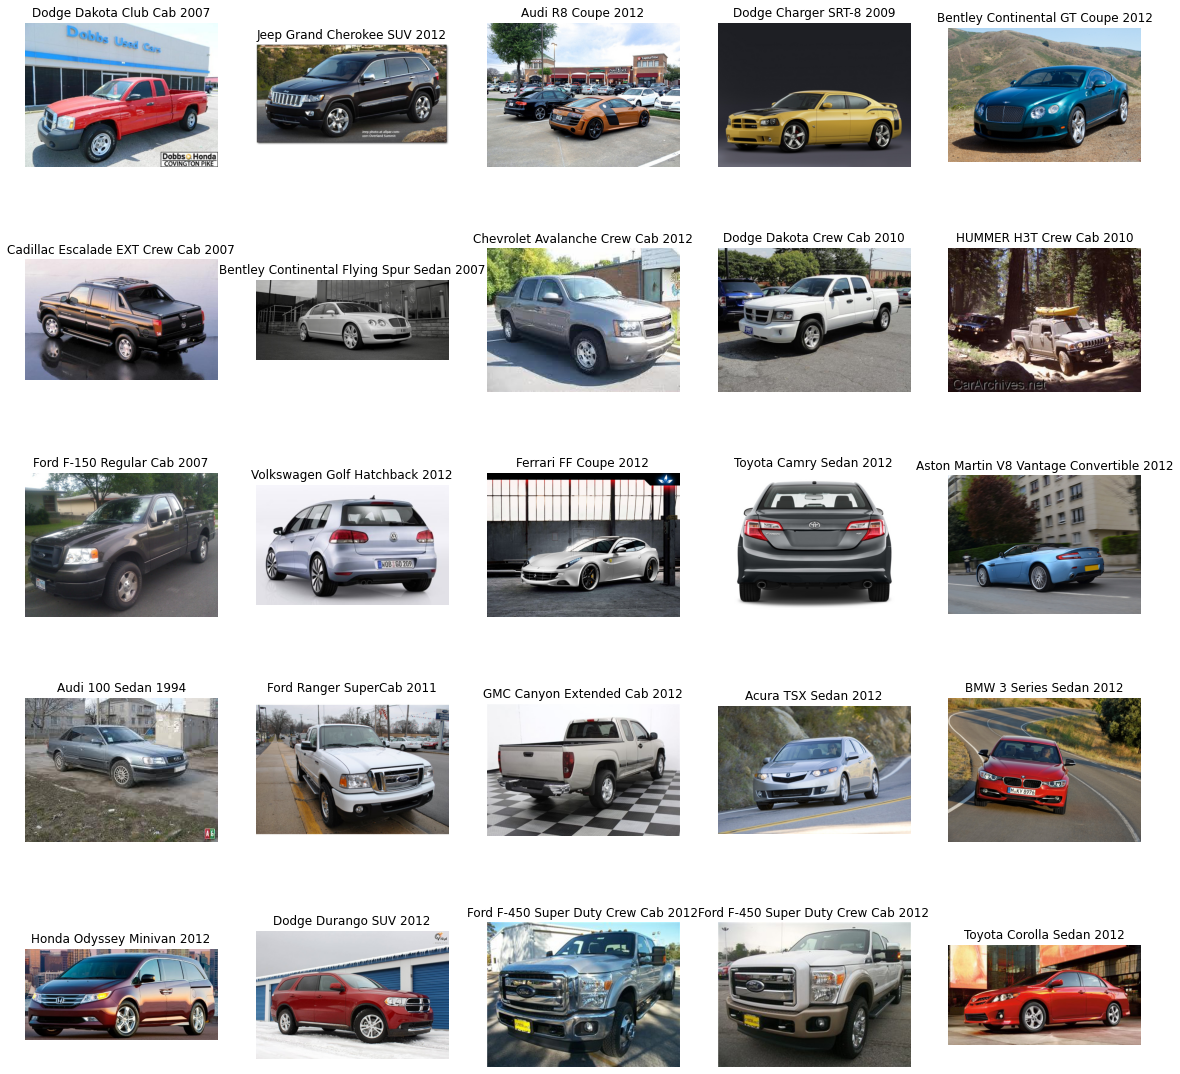

In [ ]:
show_images(train_filepaths, train_labels, random_state=50)

In [ ]:
for i in range(78,85):
  fig, ax = plt.subplots()
  ax.imshow(plt.imread(train_filepaths[i]))
  rect = patches.Rectangle((train_bbox_x1[i], train_bbox_y1[i]), train_bbox_x2[i]-train_bbox_x1[i], train_bbox_y2[i]- train_bbox_y1[i], linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


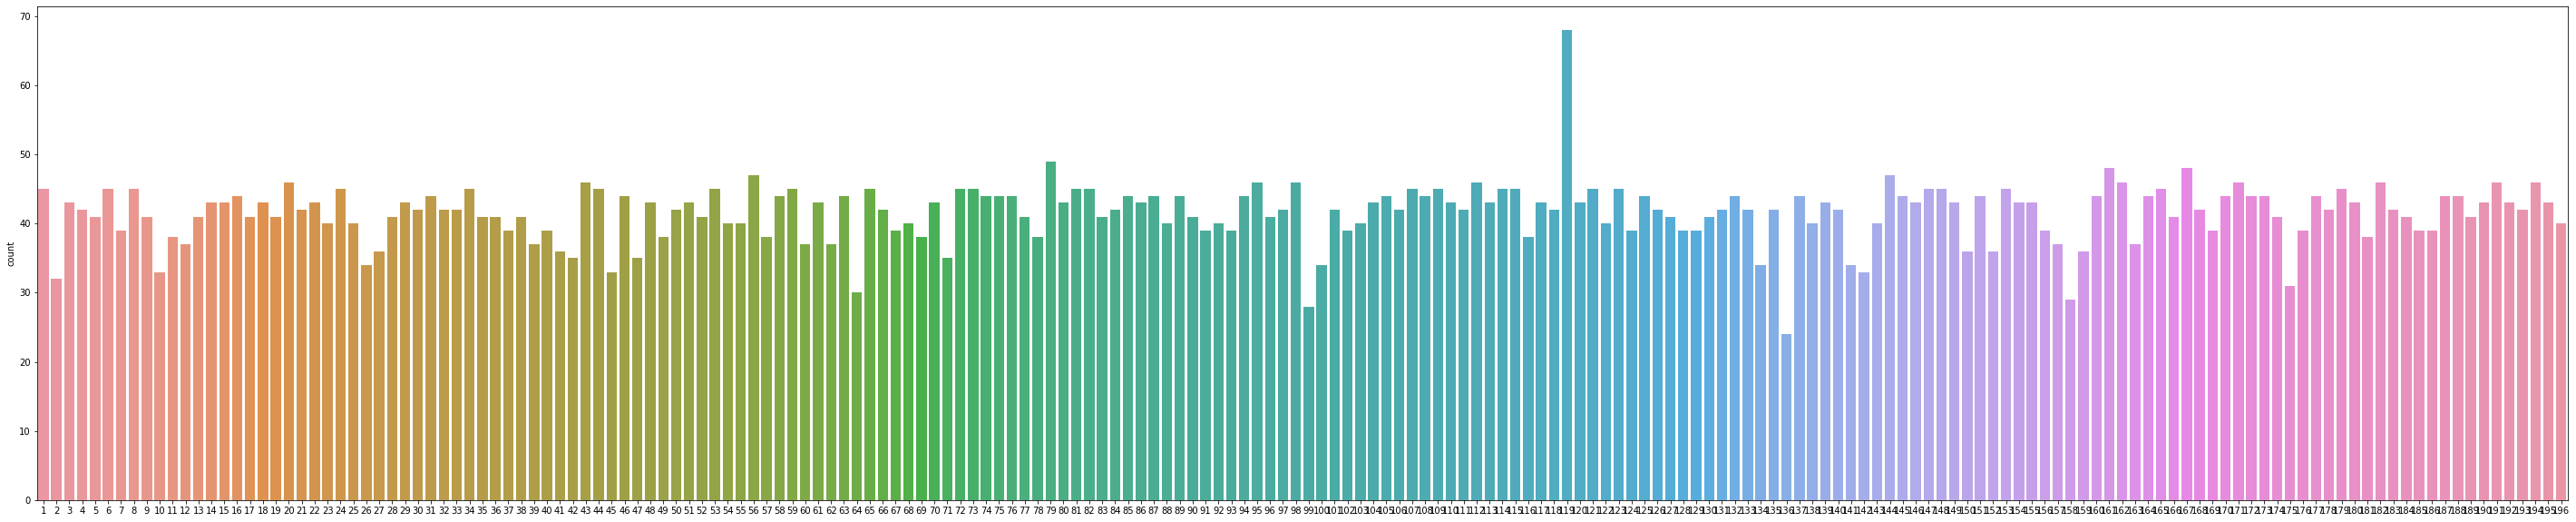

In [ ]:
plt.figure(figsize=(50,10))
sns.countplot(train_labels)

In [ ]:
unique_elements, counts_elements = np.unique(train_labels, return_counts=True)
np.mean(counts_elements)

41.55102040816327

In [ ]:
train_labels=[np.array(list(classes.keys()))==label for label in train_labels]

In [ ]:
dataset_size = 2858 #@param {type:"slider",min:0,max:8145, step:1}

In [ ]:
train_filepaths = np.array(train_filepaths)
train_labels = np.array(train_labels)
train_bbox_x1 = np.array(train_bbox_x1)
train_bbox_y1 = np.array(train_bbox_y1)
train_bbox_x2 = np.array(train_bbox_x2)
train_bbox_y2 = np.array(train_bbox_y2)

In [ ]:
def train_valid_split(X, y, x1, y1, x2, y2, valid_size):
  
  sss=StratifiedShuffleSplit(n_splits=1, test_size=valid_size, random_state=0)

  for train_index, valid_index in sss.split(X,y):
    X_train = X[train_index]
    y_train = y[train_index]
    x1_train = x1[train_index]
    y1_train = y1[train_index]
    x2_train = x2[train_index] 
    y2_train = y2[train_index]

    X_valid = X[valid_index]
    y_valid = y[valid_index]
    x1_valid = x1[valid_index]
    y1_valid = y1[valid_index]
    x2_valid = x2[valid_index]
    y2_valid = y2[valid_index] 
  return X_train, y_train, x1_train, y1_train, x2_train, y2_train, X_valid, y_valid, x1_valid, y1_valid, x2_valid, y2_valid

In [ ]:
X_train, y_train, x1_train, y1_train, x2_train, y2_train, X_valid, y_valid, x1_valid, y1_valid, x2_valid, y2_valid = train_valid_split( train_filepaths[:dataset_size],
                                                                                                                                       train_labels[:dataset_size],
                                                                                                                                       train_bbox_x1[:dataset_size],
                                                                                                                                       train_bbox_y1[:dataset_size],
                                                                                                                                       train_bbox_x2[:dataset_size],
                                                                                                                                       train_bbox_y2[:dataset_size],
                                                                                                                                       valid_size=0.2
    
)

In [ ]:
len(X_train),len(X_valid)

(1786, 447)

In [ ]:
X_train = list(X_train)
y_train = list(y_train)
x1_train = list(x1_train)
y1_train = list(y1_train)
x2_train = list(x2_train)
y2_train = list(y2_train)
X_valid = list(X_valid)
y_valid = list(y_valid)
x1_valid = list(x1_valid)
y1_valid = list(y1_valid)
x2_valid = list(x2_valid)
y2_valid = list(y2_valid)

In [ ]:
IMG_SIZE=224
def image_process(image_path, x1, y1, x2, y2, image_size=IMG_SIZE):
  image = tf.io.read_file(image_path)
  image = tf.io.decode_jpeg(image, channels=3)
  image = tf.image.crop_to_bounding_box(image, y1, x1, y2-y1, x2-x1)
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  image = tf.image.resize(image, size=[image_size, image_size])
  return image

In [ ]:
def get_label(image_path,label,x1,y1,x2,y2):
  image = image_process(image_path, x1, y1, x2, y2)
  return image, label

In [ ]:
BATCH=32
def batchify(X,bbox_x1, bbox_y1, bbox_x2,bbox_y2,y=None,batch=BATCH, validation=None, test=None):
  if test:
    dataset=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                tf.constant(bbox_x1),
                                                tf.constant(bbox_y1),
                                                tf.constant(bbox_x2),
                                                tf.constant(bbox_y2)
                                                ))
    data_batch = dataset.map(image_process).batch(batch)
    return data_batch
  elif validation:
    dataset=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                tf.constant(y),
                                                tf.constant(bbox_x1),
                                                tf.constant(bbox_y1),
                                                tf.constant(bbox_x2),
                                                tf.constant(bbox_y2)))
    data_batch = dataset.map(get_label).batch(batch)
    return data_batch
  else:
    dataset = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                  tf.constant(y),
                                                  tf.constant(bbox_x1),
                                                  tf.constant(bbox_y1),
                                                  tf.constant(bbox_x2),
                                                  tf.constant(bbox_y2)))
    dataset=dataset.shuffle(buffer_size=len(X))
    data_batch=dataset.map(get_label).batch(batch)
    return data_batch

In [ ]:
train_filepaths = list(train_filepaths)
train_labels = list(train_labels)
train_bbox_x1 = list(train_bbox_x1)
train_bbox_y1 = list(train_bbox_y1)
train_bbox_x2 = list(train_bbox_x2)
train_bbox_y2 = list(train_bbox_y2)

In [ ]:
train_data = batchify(X=X_train,bbox_x1=x1_train, bbox_y1=y1_train, bbox_x2=x2_train,bbox_y2=y2_train, y=y_train)
valid_data = batchify(X=X_valid,bbox_x1=x1_valid, bbox_y1=y1_valid, bbox_x2=x2_valid,bbox_y2=y2_valid, y=y_valid, validation=True)
test_data =  batchify(X=test_filepaths,bbox_x1=test_bbox_x1, bbox_y1=test_bbox_y1, bbox_x2=test_bbox_x2,bbox_y2=test_bbox_y2, test=True)
full_data = batchify(X=train_filepaths, bbox_x1=train_bbox_x1, bbox_y1=train_bbox_y1, bbox_x2=train_bbox_x2,bbox_y2=train_bbox_y2, y=train_labels)

In [ ]:
train_data,valid_data,test_data

(<BatchDataset shapes: ((None, 224, 224, 3), (None, 196)), types: (tf.float32, tf.bool)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None, 196)), types: (tf.float32, tf.bool)>,
 <BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>)

In [ ]:
INPUT_SHAPE = [None, 224 ,224,3]

In [ ]:

def pre_trained_model():

  model =tf.keras.Sequential([
                              hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"), 
                              tf.keras.layers.Dense(units=196, activation="softmax") 
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                loss= tf.keras.losses.CategoricalCrossentropy(),
                metrics=["accuracy"])
  
  model.build(INPUT_SHAPE)

  return model
  
model = pre_trained_model_2()
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_3 (Dense)              (None, 196)               196392    
Total params: 5,629,105
Trainable params: 196,392
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
%load_ext tensorboard
def monitor_logs(model_name):
  log_dir = os.path.join("/content/drive/MyDrive/Stanford Cars Dataset/logs",model_name,datetime.datetime.now().strftime("%d%m%y-%H%M%S"))
  return TensorBoard(log_dir)

early_stopping = EarlyStopping(monitor="accuracy", mode="max", patience=2)

accuracy_threshold = 0.997 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy")>accuracy_threshold):
      print("reached 99% accuracy")
      self.model.stop_training=True

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
#tensorboard = monitor_logs("mobilenetv2")
#callback = myCallback()
#model.fit(train_data, validation_data=valid_data, epochs=200, callbacks=[tensorboard, early_stopping])

In [ ]:
tensorboard = monitor_logs("mobilenetv2")
callback = myCallback()
model.fit(full_data, epochs=200, callbacks=[callback, early_stopping])

Epoch 1/200
255/255 [==============================] - 60s 234ms/step - loss: 3.8188 - accuracy: 0.1785
Epoch 2/200
255/255 [==============================] - 55s 217ms/step - loss: 2.4139 - accuracy: 0.4501
Epoch 3/200
255/255 [==============================] - 55s 215ms/step - loss: 1.8140 - accuracy: 0.6013
Epoch 4/200
255/255 [==============================] - 55s 216ms/step - loss: 1.4494 - accuracy: 0.6860
Epoch 5/200
255/255 [==============================] - 55s 215ms/step - loss: 1.1988 - accuracy: 0.7501
Epoch 6/200
255/255 [==============================] - 55s 216ms/step - loss: 1.0139 - accuracy: 0.8003
Epoch 7/200
255/255 [==============================] - 55s 215ms/step - loss: 0.8668 - accuracy: 0.8344
Epoch 8/200
255/255 [==============================] - 55s 215ms/step - loss: 0.7515 - accuracy: 0.8625
Epoch 9/200
255/255 [==============================] - 55s 215ms/step - loss: 0.6538 - accuracy: 0.8919
Epoch 10/200
255/255 [==============================] - 55s 214m

In [ ]:
%tensorboard --logdir"/content/drive/MyDrive/Stanford Cars Dataset/logs/mobilenetv2"

In [ ]:
#model.save("/content/drive/MyDrive/Stanford Cars Dataset/models/mobilenetv2.h5")

In [ ]:
pred_prob= model.predict(test_data)

In [ ]:
y_pred=np.argmax(pred_prob,1)+1

In [ ]:
print(f" Accracy : {accuracy_score(true_test_labels, y_pred)}")
print(f"F1 Score : {f1_score(true_test_labels, y_pred)}")